In [90]:
#Importing libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
#Reading the data

In [67]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
#Exploratory Data Analysis

In [68]:
print("Train: ", train.shape)
print("Test: ",test.shape)

Train:  (7352, 563)
Test:  (2947, 563)


In [69]:
print(train.Activity.unique())
print("**************************************")
print(train.Activity.value_counts())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
**************************************
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


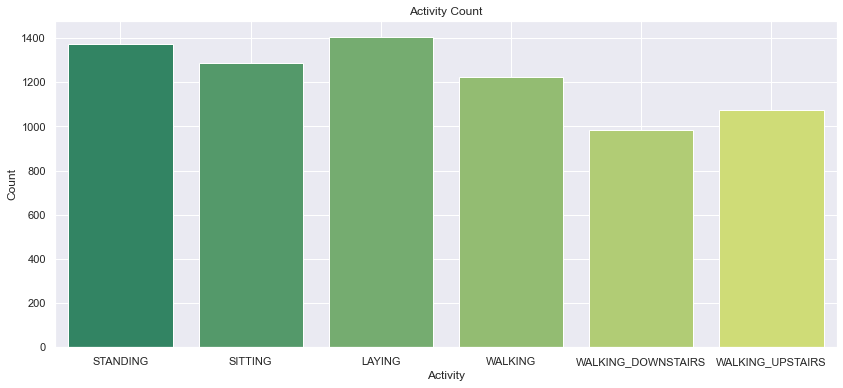

In [70]:
sns.set(rc={'figure.figsize':(14,6)})
fig = sns.countplot(x = "Activity" , data = train, palette='summer' )
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

In [72]:
#Check for null values in dataset
print('Null Values In Test Data: {}\n'.format(test.isna().sum().sum()))
print('Null Values In Train Data: {}\n'.format(train.isna().sum().sum()))

Null Values In Test Data: 0

Null Values In Train Data: 0



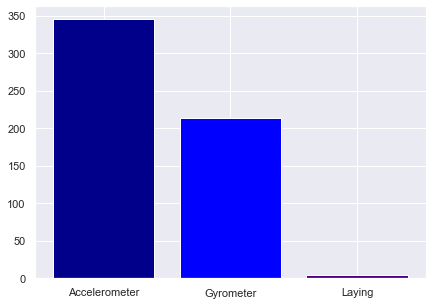

In [73]:
acc=0
gyro=0
others=0
for column in train.columns:
    if "Acc" in str(column):
        acc+=1
    elif "Gyro" in str(column):
        gyro+=1
    else:
        others+=1
        
plt.figure(figsize=(7,5))
plt.bar(['Accelerometer','Gyrometer','Laying'],[acc,gyro,others],color=['darkblue','blue','indigo']);

In [74]:
pd.crosstab(train.subject, train.Activity, margins=True).style.background_gradient(cmap='autumn_r')

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
3,62,52,61,58,49,59,341
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
11,57,53,47,59,46,54,316
14,51,54,60,59,45,54,323
15,72,59,53,54,42,48,328


In [75]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

([<matplotlib.patches.Wedge at 0x1d0926674a8>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.137649'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.688792'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.491838'),
  Text(-0.3923524924230064, -0.453937794955933, '16.675735'),
  Text(0.15982683536458778, -0.5783211760754926, '14.594668'),
  Text(0.5475277272492978, -0.24538416390064502, '13.411316')])

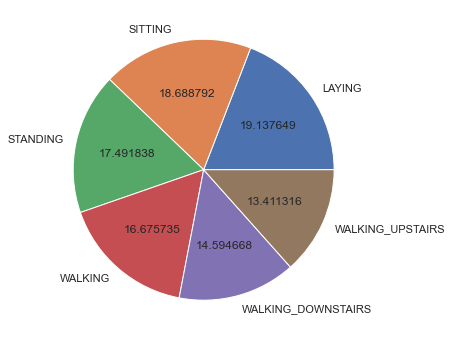

In [76]:
plt.figure(figsize=(6,6))
plt.pie(np.array(train['Activity'].value_counts()), labels = sorted(train['Activity'].unique()), autopct = '%0.6f')


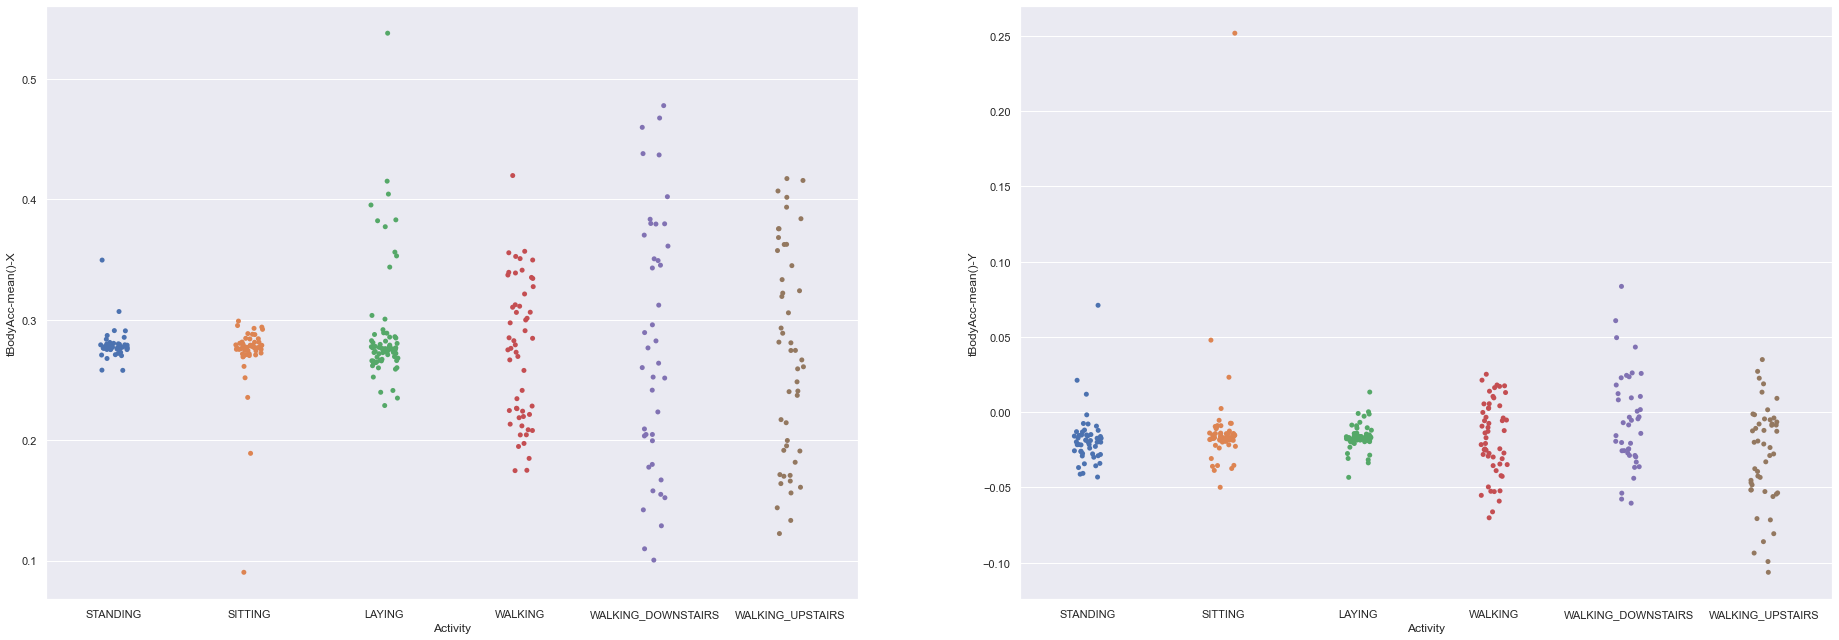

In [77]:
sub15 = train.loc[train['subject']==15]
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sns.stripplot(x='Activity', y=sub15.iloc[:,0], data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sns.stripplot(x='Activity', y=sub15.iloc[:,1], data=sub15, jitter=True)
plt.show()

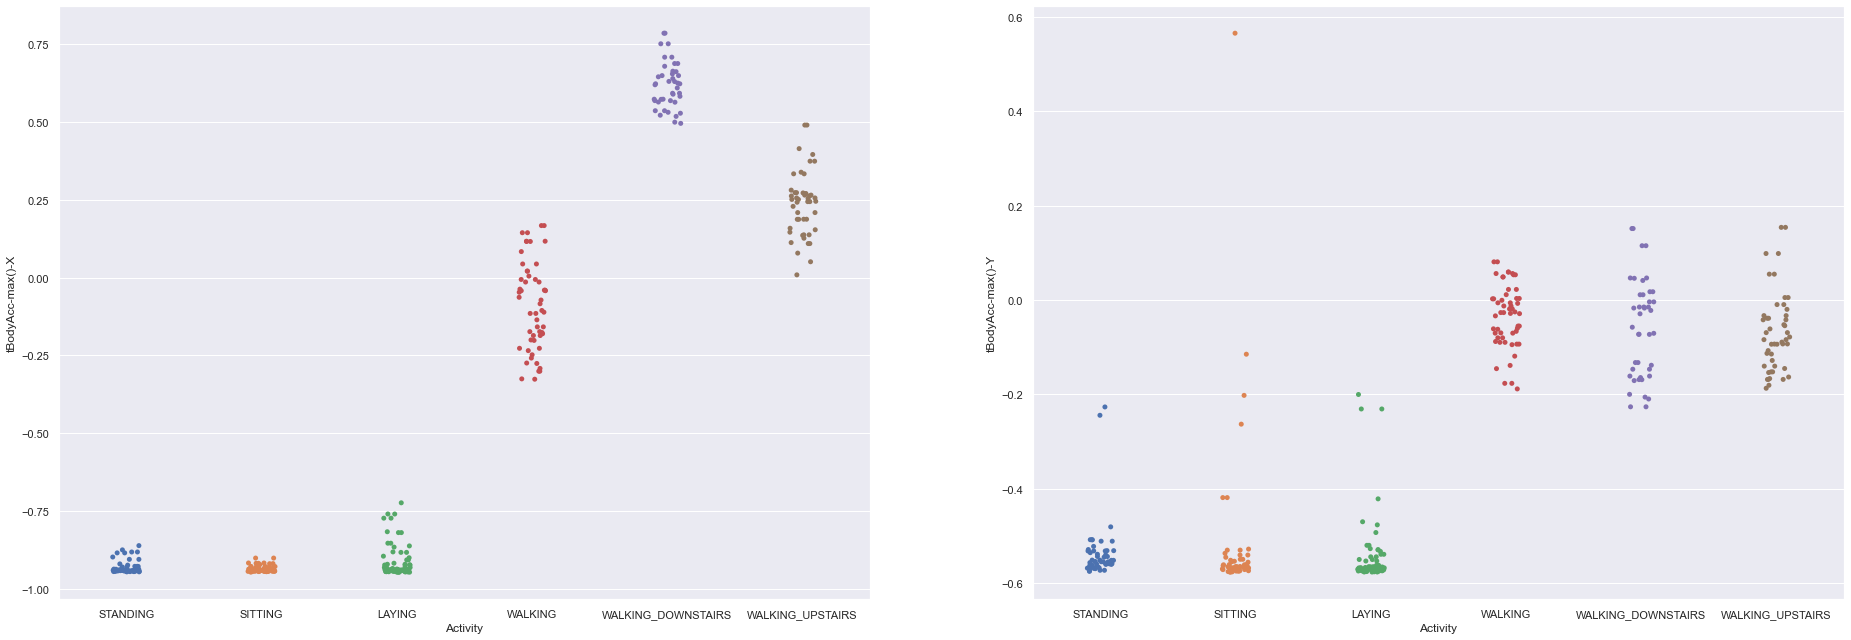

In [78]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sns.stripplot(x='Activity', y='tBodyAcc-max()-X', data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sns.stripplot(x='Activity', y='tBodyAcc-max()-Y', data=sub15, jitter=True)
plt.show()

In [ ]:
#Principal Component Analysis

In [117]:
X= train.drop(columns=['Activity'])
X=X.values
pca = PCA(n_components=3)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)
#561 Columns present in X are now represented by 3-Principal components present in reduced_X

In [118]:
df= pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3'])
df['activity']=train['Activity']
df.head()

,PC1,PC2,PC3,activity
0,15.727224,-7.246259,-0.465589,STANDING
1,15.723317,-7.260690,-0.259002,STANDING
2,15.742570,-7.204006,0.106483,STANDING
3,15.715666,-7.403807,0.719931,STANDING
4,15.703153,-7.473707,0.987220,STANDING


array([[<AxesSubplot:title={'center':'PC1'}>,
        <AxesSubplot:title={'center':'PC2'}>],
       [<AxesSubplot:title={'center':'PC3'}>, <AxesSubplot:>]],
      dtype=object)

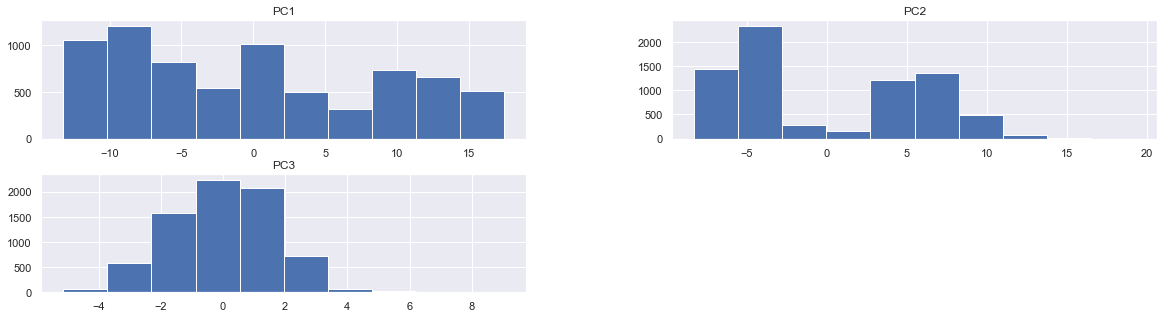

In [119]:
#Since PC1, PC2, PC3 is continuous in nature, we will use histogram to visualize it.
#For Activity, we will use bar chart because it is categorical in nature.
df.hist(['PC1','PC2','PC3'],figsize=(20,5))

In [ ]:
#Visualize relation between predictors and target variable

array([<AxesSubplot:title={'center':'PC1'}, xlabel='activity'>,
       <AxesSubplot:>], dtype=object)

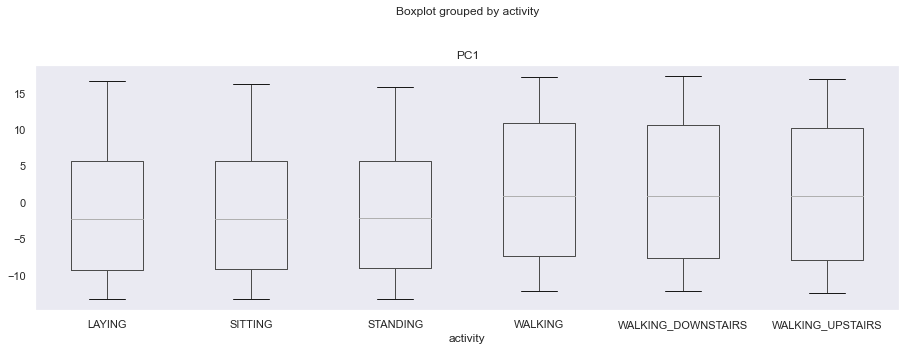

In [121]:
df.boxplot(column=['PC1'], by='activity', figsize=(15,10),grid=False, layout=(2,1))

<AxesSubplot:title={'center':'PC2'}, xlabel='activity'>

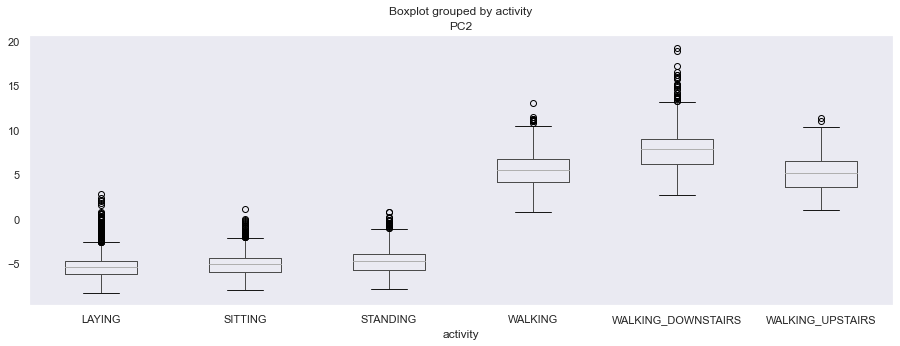

In [122]:
df.boxplot(column=['PC2'], by='activity', figsize=(15,5),grid=False)

<AxesSubplot:title={'center':'PC3'}, xlabel='activity'>

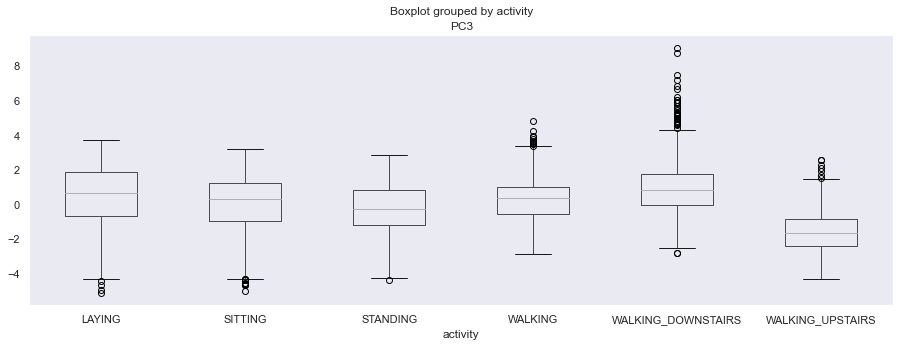

In [123]:
df.boxplot(column=['PC3'], by='activity', figsize=(15,5),grid=False)

In [ ]:
#Test for correlation

In [124]:
def anova_test(data,target,predictor):
    data1=data.groupby(target)[predictor].apply(list)
    from scipy.stats import f_oneway
    AnovaResults = f_oneway(*data1)
    if AnovaResults[1]<0.05:
        print(str(predictor)+' is related with the target variable : ', AnovaResults[1])
    else:
        print(str(predictor)+' is NOT related with the target variable : ', AnovaResults[1])

In [125]:
anova_test(df,'activity','PC1')

PC1 is related with the target variable :  3.434667375965409e-24


In [126]:
anova_test(df,'activity','PC2')

PC2 is related with the target variable :  0.0


In [127]:
anova_test(df,'activity','PC3')

PC3 is related with the target variable :  0.0


In [ ]:
#The predictors are related to the target variable. But we have not used in our models as it can reduce accuracy  

In [ ]:
#Applying different algorithms

In [163]:
x_train=train.iloc[:,:-2]
y_train=train.iloc[:,-1]

x_test=test.iloc[:,:-2]
y_test=test.iloc[:,-1]

In [ ]:
#K-Nearest Classifier

In [130]:
clf = KNeighborsClassifier(n_neighbors=3)

# Creating the model on Training Data
KNN=clf.fit(x_train,y_train)
prediction=KNN.predict(x_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.87      0.78      0.82       491
          STANDING       0.82      0.89      0.85       532
           WALKING       0.85      0.97      0.91       496
WALKING_DOWNSTAIRS       0.93      0.78      0.85       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.89      2947
         macro avg       0.89      0.89      0.89      2947
      weighted avg       0.89      0.89      0.89      2947

[[535   1   1   0   0   0]
 [  0 383 105   0   0   3]
 [  0  57 475   0   0   0]
 [  0   0   0 481  11   4]
 [  0   0   0  49 329  42]
 [  0   0   0  36  13 422]]
Accuracy of the model: 0.89


In [ ]:
#Logistic Regression

In [131]:
clf = LogisticRegression(C=1)
LOG=clf.fit(x_train,y_train)
prediction=LOG.predict(x_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

C:\Users\susat\anaconda3\envs\new_environment\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

[[537   0   0   0   0   0]
 [  0 430  58   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  23   1 447]]
Accuracy of the model: 0.96


In [ ]:
# Decision Tree Classifier

In [133]:

clf = DecisionTreeClassifier(max_depth=3,criterion='entropy')
DTree=clf.fit(x_train,y_train)
prediction=DTree.predict(x_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.79      0.81      0.80       491
          STANDING       0.82      0.80      0.81       532
           WALKING       0.65      0.87      0.75       496
WALKING_DOWNSTAIRS       0.93      0.65      0.76       420
  WALKING_UPSTAIRS       0.77      0.71      0.74       471

          accuracy                           0.82      2947
         macro avg       0.83      0.81      0.81      2947
      weighted avg       0.83      0.82      0.82      2947

[[537   0   0   0   0   0]
 [  0 400  91   0   0   0]
 [  0 107 425   0   0   0]
 [  0   0   0 432  16  48]
 [  0   0   0  98 272  50]
 [  0   0   0 130   5 336]]
Accuracy of the model: 0.82


In [ ]:
#Random Forest Classifier

In [135]:
clf = RandomForestClassifier(max_depth=4, n_estimators=600,criterion='entropy')
RF=clf.fit(x_train,y_train)
prediction=RF.predict(x_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.64      0.78       491
          STANDING       0.75      0.99      0.85       532
           WALKING       0.81      0.97      0.88       496
WALKING_DOWNSTAIRS       0.94      0.72      0.82       420
  WALKING_UPSTAIRS       0.87      0.87      0.87       471

          accuracy                           0.87      2947
         macro avg       0.89      0.87      0.87      2947
      weighted avg       0.89      0.87      0.87      2947

[[537   0   0   0   0   0]
 [  0 315 176   0   0   0]
 [  0   6 525   0   0   1]
 [  0   0   0 481  12   3]
 [  0   0   0  63 302  55]
 [  0   0   0  53   6 412]]
Accuracy of the model: 0.87


In [ ]:
#Support Vector Machine

In [136]:
clf = SVC(C=100, gamma=0.001, kernel='rbf')
SVM=clf.fit(x_train,y_train)
prediction=SVM.predict(x_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.97      0.94       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

[[537   0   0   0   0   0]
 [  0 434  55   0   0   2]
 [  0  14 518   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 406  10]
 [  0   0   0  23   1 447]]
Accuracy of the model: 0.96


In [ ]:
#Applying Neural Network

In [164]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [165]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values

In [166]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values

In [167]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [168]:
model=Sequential()
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=x_train.shape[1]))

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=6,kernel_initializer='uniform',activation='softmax'))

In [169]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [170]:
history=model.fit(x_train,y_train,batch_size=256,epochs=22,validation_data=(x_test,y_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/22
7352/7352 [==============================] - 1s 182us/step - loss: 1.3859 - accuracy: 0.4030 - val_loss: 0.9165 - val_accuracy: 0.6444
Epoch 2/22
7352/7352 [==============================] - 1s 93us/step - loss: 0.6399 - accuracy: 0.7597 - val_loss: 0.4214 - val_accuracy: 0.8266
Epoch 3/22
7352/7352 [==============================] - 1s 76us/step - loss: 0.3101 - accuracy: 0.8765 - val_loss: 0.2799 - val_accuracy: 0.8711
Epoch 4/22
7352/7352 [==============================] - 0s 63us/step - loss: 0.1899 - accuracy: 0.9222 - val_loss: 0.2090 - val_accuracy: 0.9247
Epoch 5/22
7352/7352 [==============================] - 0s 65us/step - loss: 0.1263 - accuracy: 0.9550 - val_loss: 0.2254 - val_accuracy: 0.9138
Epoch 6/22
7352/7352 [==============================] - 0s 62us/step - loss: 0.0918 - accuracy: 0.9674 - val_loss: 0.1939 - val_accuracy: 0.9294
Epoch 7/22
7352/7352 [==============================] - 0s 65us/step - loss: 0.07

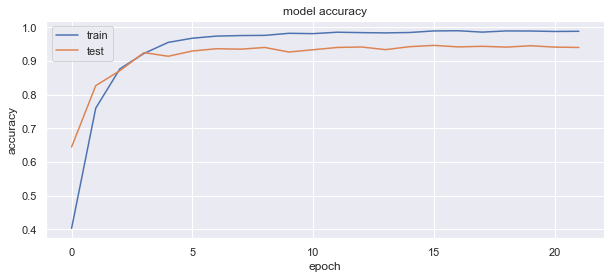

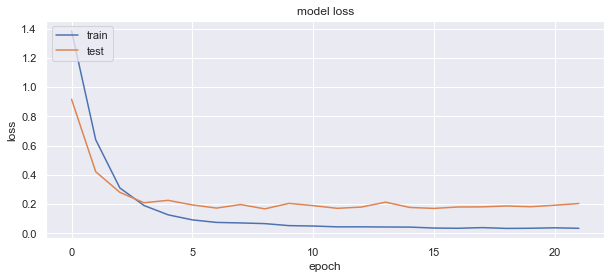

In [180]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [181]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=model.predict(x_test)
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)
accuracy=accuracy_score(y_test_class,y_pred_class)

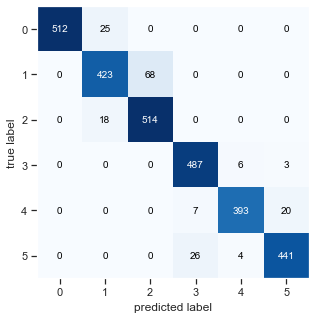

In [179]:
CM = confusion_matrix(y_test_class, y_pred_class)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 5))
plt.show()

In [182]:
accuracy

0.9399389209365456